In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_excel("./data/BD_HackMTY_ChoquesYSiniestrosMONTERREY_2020_V2.xlsx")
dataset.head()

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE
0,D00005,19.266303,-99.331791,\N,UBERP3,Cuajimalpa,HUELGAS Y ALBOROTOS,Auto,NEGRO,2016,Medio,NaN,2018,1,3,MIERCOLES,16,NUEVO LEÓN,MONTERREY,2018-01-03
1,D00007,25.660916,-100.282504,64820,Avenida Revolución,Valle del Huajuco,COLISION Y/O VUELCO,Auto,PLATA,2006,NaN,NaN,2018,1,22,LUNES,12,NUEVO LEÓN,MONTERREY,2018-01-22
2,D00011,25.724544,-100.373691,64619,ABEDUL,VILLA DORADA,COLISION Y/O VUELCO,Auto,ROJO,2015,Bajo,Costado der central,2018,1,1,LUNES,0,NUEVO LEÓN,MONTERREY,2018-01-01
3,D00012,25.631471,-100.300988,64760,ALFONSO REYES,15 de Septiembre,COLISION Y/O VUELCO,Auto,BLANCO,2000,Sin daño,Costado izq delantero,2018,1,1,LUNES,2,NUEVO LEÓN,MONTERREY,2018-01-01
4,D00019,25.728476,-100.333627,64250,Pablo Hernández,FERROCARRILERA,COLISION Y/O VUELCO,Auto,BLANCO,2015,Bajo,Costado izq delantero,2018,1,1,LUNES,9,NUEVO LEÓN,MONTERREY,2018-01-01


In [5]:
dataset.shape

(43430, 20)

In [6]:
dataset.describe()

,LAT,LONG,AÑO,MES,DÍA NUMERO,HORA
count,42450.000000,42450.000000,43430.000000,43430.000000,43430.000000,43430.000000
mean,25.681225,-100.321721,2016.686116,5.931476,15.630233,13.791227
std,0.253416,0.243406,0.733553,3.428503,8.734083,4.598494
min,-12.038977,-115.070033,2016.000000,1.000000,1.000000,0.000000
25%,25.665644,-100.354870,2016.000000,3.000000,8.000000,10.000000
50%,25.684043,-100.322837,2017.000000,5.000000,16.000000,14.000000
75%,25.710717,-100.291083,2017.000000,9.000000,23.000000,17.000000
max,33.640945,-66.017857,2018.000000,12.000000,31.000000,23.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43430 entries, 0 to 43429
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FOLIO_ID             43430 non-null  object        
 1   LAT                  42450 non-null  float64       
 2   LONG                 42450 non-null  float64       
 3   CODIGO POSTAL        43390 non-null  object        
 4   CALLE                43429 non-null  object        
 5   COLONIA              43411 non-null  object        
 6   CAUSA SINIESTRO      43430 non-null  object        
 7   TIPO VEHICULO        43394 non-null  object        
 8   COLOR                43371 non-null  object        
 9   MODELO_VEHICULO      43396 non-null  object        
 10  NIVEL DAÑO VEHICULO  43127 non-null  object        
 11  PUNTO DE IMPACTO     39625 non-null  object        
 12  AÑO                  43430 non-null  int64         
 13  MES                  43430 non-

Text(0.5, 1.0, 'Missing values')

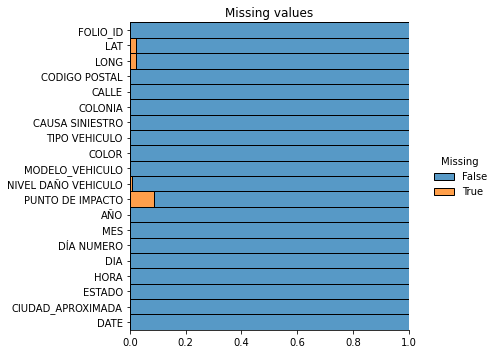

In [8]:
sns.displot(
    data = dataset.isna().melt(value_name="Missing"),
    y = "variable",
    hue="Missing",
    multiple = "fill",
    aspect=1.25
)
plt.ylabel("")
plt.xlabel("")
plt.title("Missing values")

In [9]:
dataset['TIPO VEHICULO'].describe()

count     43394
unique        5
top        Auto
freq      35309
Name: TIPO VEHICULO, dtype: object

In [10]:
dataset['TIPO VEHICULO'].unique()

array(['Auto', 'Camión Ligero', 'Camión', nan, 'Motocicleta', '\\N'],
      dtype=object)

In [11]:
len(dataset['CODIGO POSTAL'].unique())

498

In [12]:
dataset['CODIGO POSTAL'].value_counts()[:10]/len(dataset)

64000     0.124545
64620     0.065853
64590     0.060419
64330     0.055146
64619     0.035667
64200     0.027262
647770    0.026456
6400      0.024154
64988     0.022542
\N        0.022266
Name: CODIGO POSTAL, dtype: float64

In [13]:
dataset['TIPO VEHICULO'].value_counts()/len(dataset)

Auto             0.813009
Camión           0.159751
Camión Ligero    0.022128
\N               0.003224
Motocicleta      0.001059
Name: TIPO VEHICULO, dtype: float64

<AxesSubplot:xlabel='TIPO VEHICULO', ylabel='count'>

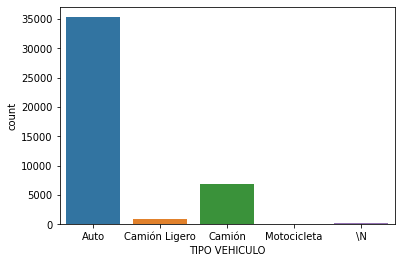

In [20]:
sns.countplot(x = 'TIPO VEHICULO', data=dataset)

In [14]:
dataset['COLOR'].value_counts()/len(dataset)

BLANCO           0.260718
GRIS             0.167235
ROJO             0.085563
PLATA            0.073498
NEGRO            0.063389
                   ...   
VERDE OPAL       0.000023
Gris/2015        0.000023
AZUL Y BLANCO    0.000023
2015 bco         0.000023
vino /dora       0.000023
Name: COLOR, Length: 1297, dtype: float64

In [15]:
len(dataset['COLOR'].unique())

1298

In [16]:
dataset['COLOR'].unique()

array(['NEGRO', 'PLATA', 'ROJO', ..., 'CAFE ARENA', 'naranga',
       'vino /dora'], dtype=object)

In [17]:
dataset['AÑO'].describe()

count    43430.000000
mean      2016.686116
std          0.733553
min       2016.000000
25%       2016.000000
50%       2017.000000
75%       2017.000000
max       2018.000000
Name: AÑO, dtype: float64

In [18]:
dataset['HORA'].value_counts()/len(dataset)

14    0.081142
13    0.079553
18    0.074649
15    0.072346
16    0.070366
17    0.068570
12    0.065600
9     0.065462
19    0.064449
8     0.062653
11    0.059613
10    0.057265
20    0.043749
7     0.036703
21    0.029772
22    0.019180
23    0.012319
6     0.008727
0     0.007691
1     0.005710
2     0.004099
3     0.003776
5     0.003707
4     0.002901
Name: HORA, dtype: float64

Text(0.5, 1.0, 'Distribución de acuerdo a la hora del día')

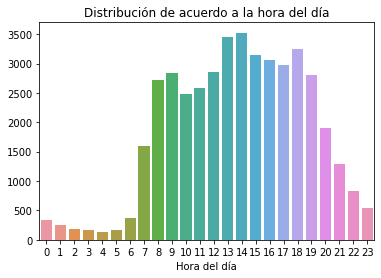

In [22]:
sns.countplot(x = 'HORA', data = dataset)
plt.ylabel("")
plt.xlabel("Hora del día")
plt.title("Distribución de acuerdo a la hora del día")

In [23]:
dataset['DIA'].value_counts()/len(dataset)

VIERNES      0.170021
MARTES       0.162376
MIERCOLES    0.161179
JUEVES       0.158554
LUNES        0.153166
SABADO       0.132604
DOMINGO      0.062100
Name: DIA, dtype: float64

<AxesSubplot:xlabel='DIA', ylabel='count'>

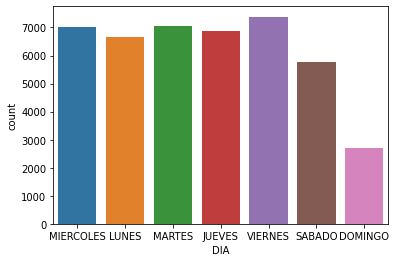

In [24]:
sns.countplot(x='DIA', data = dataset)

In [31]:
dataset['MES'].value_counts()/len(dataset)

5     0.105066
2     0.102763
1     0.101059
3     0.096684
6     0.095096
4     0.094819
10    0.069445
12    0.068662
11    0.068386
8     0.068271
9     0.067304
7     0.062445
Name: MES, dtype: float64

Text(0, 0.5, '')

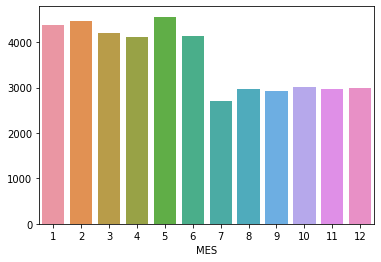

In [27]:
sns.countplot(x= 'MES', data=dataset)
plt.ylabel("")